<a href="https://colab.research.google.com/github/zry3fr/undergrad_ml_assignments/blob/main/COMPLETE_02_assignment_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import urllib.request
import os
import zipfile
import os

def download_data(force=False):
    """Download and extract course data from Zenodo."""

    zip_path = 'data.zip'
    data_dir = './data'

    if not os.path.exists(zip_path) or force:
        print("Downloading course data...")
        urllib.request.urlretrieve(
            'https://zenodo.org/records/18235955/files/data.zip?download=1',
            zip_path
        )
        print("Download complete")

    if not os.path.exists(data_dir) or force:
        print("Extracting data files...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(data_dir)
        print("Data extracted")

    return data_dir


if __name__ == "__main__":
    download_data()

Download complete
Extracting data files...
Data extracted


## Assignment 2: $k$ Nearest Neighbor

### Do any four.

**Q1.** Please answer the following questions.
1. Regression predicts a numeric outcome while classification predicts a categorical outcome.
2. A confusion table/matrix is a cross-tabulation of predicted and actual values that compares the two. It helps us look for patterns in the successes and failures of the model.
3. Accuracy is the proportion of predictions the model gets correct. It might not be entirely sufficient, because it ignores the practical asymmetry between a false positive and a false negative.
4. The root mean squared error measures the typical size of a model's prediction error in a regression. For example, it tells us how far predictions are from actual values on average.
5. Overfitting occurs when your model is too complex to reliably explain the phenomenon you are interested in. Underfitting occurs when your model is too simple to reliably explain the phenomenon you are interested in.
6. Splitting the data into training and testing sets allows us to train the model on one set of data and analyze how well it performs on unused data. Choosing k by evalutating Accuracy or RMSE on the test set helps prevent overfitting and provides a more realistic estimate of performance. This process improves model performance overall, because it ensures the model generalizes rather than memorizes.
7. **Class labels as a prediction**


*   **Strengths:** Simple and easy to understand. More useful for direct decisions.
*   **Weaknesses:** Loses information about uncertainty and confidence.

   **Class labels as a probability distribution:**


*   **Strengths:** Shows certainty in predictions and better for riskier decisions. More flexible and informative predictions.
*  **Weaknesses:** More complex to understand and requires choosing decision thresholds.





**Q2.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.



1.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
mines = pd.read_csv('/content/data/land_mines.csv')
mines.head()

,voltage,height,soil,mine_type
0,0.338157,0.000000,0.0,1
1,0.320241,0.181818,0.0,1
2,0.287009,0.272727,0.0,1
3,0.256284,0.454545,0.0,1
4,0.262840,0.545455,0.0,1


In [ ]:
mines.describe()

,voltage,height,soil,mine_type
count,338.000000,338.000000,338.000000,338.000000
mean,0.430634,0.508876,0.503550,2.952663
std,0.195819,0.306043,0.344244,1.419703
min,0.197734,0.000000,0.000000,1.000000
25%,0.309737,0.272727,0.200000,2.000000
50%,0.359516,0.545455,0.600000,3.000000
75%,0.482628,0.727273,0.800000,4.000000
max,0.999999,1.000000,1.000000,5.000000


In [ ]:
mines.value_counts()

voltage   height    soil  mine_type
0.999999  0.545455  0.4   2            1
0.197734  0.818182  0.8   4            1
0.999999  0.000000  0.4   2            1
                    0.0   2            1
0.993956  0.090909  1.0   2            1
                                      ..
0.227522  0.454545  0.8   4            1
0.227009  0.636364  0.8   4            1
0.223565  0.272727  0.4   4            1
0.213097  0.818182  0.4   4            1
0.209818  0.909091  0.4   4            1
Name: count, Length: 338, dtype: int64

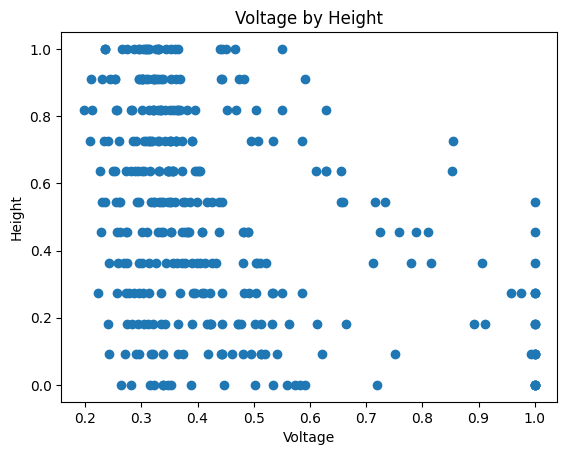

In [ ]:
plt.figure()
plt.scatter(mines['voltage'], mines['height'])
plt.xlabel('Voltage')
plt.ylabel('Height')
plt.title('Voltage by Height')
plt.show()

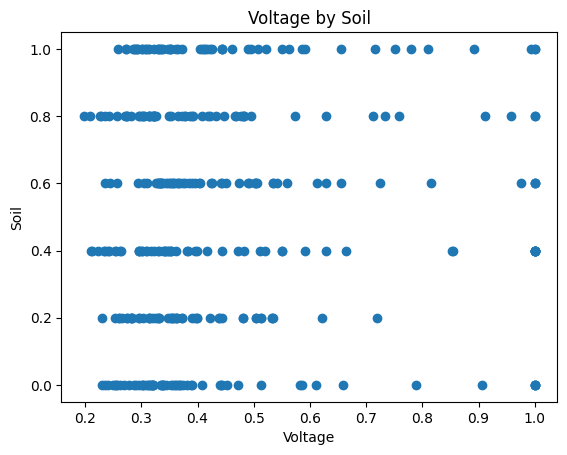

In [ ]:
plt.figure()
plt.scatter(mines['voltage'], mines['soil'])
plt.xlabel('Voltage')
plt.ylabel('Soil')
plt.title('Voltage by Soil')
plt.show()

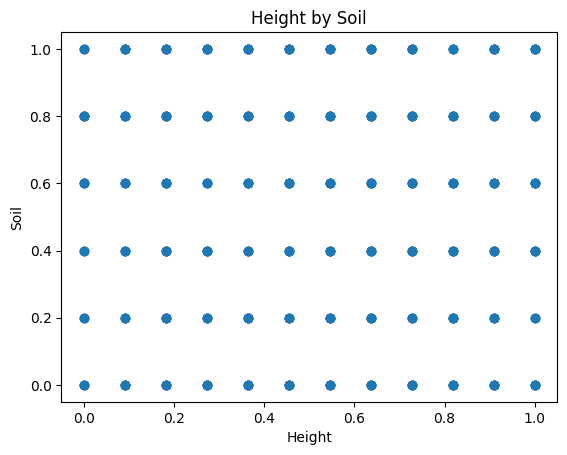

In [ ]:
plt.figure()
plt.scatter(mines['height'], mines['soil'])
plt.xlabel('Height')
plt.ylabel('Soil')
plt.title('Height by Soil')
plt.show()

2.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
X = mines[['voltage', 'height', 'soil']]
y = mines['mine_type']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42, stratify=y
)

3.

In [ ]:
k_values = range(1, 16)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, preds))

best_k = k_values[np.argmax(accuracies)]
best_k

2

I selected k by testing values from 1 to 15 and choosing the one that produced the highest test set accuracy, ensuring the model performs best on unseen data.

4.

In [ ]:
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
best_preds = best_knn.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, best_preds)
conf_matrix

array([[25,  0,  6,  4,  1],
       [ 0, 32,  0,  3,  0],
       [12,  2,  9,  6,  4],
       [12,  5,  8,  8,  0],
       [15,  2, 10,  5,  0]])

In [ ]:
acc = accuracy_score(y_test, best_preds)
acc

0.4378698224852071

It is about 44% accurate. Mine type 2 is predicted very accurately while mine type 5 is never predicted correctly in my model.

5.

Because this model is not entirely accurate and produces many error, I would advise someone using it to not use it as a sole decision maker. It should support instead of replace decisions. Thus, the model should be used in tandem with other resources and information.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.


1.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
cars = pd.read_csv('/content/data/USA_cars_datasets.csv')
cars.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [ ]:
cars_vars = cars[['price', 'year', 'mileage']]
cars_vars

,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654
...,...,...,...
2494,7800,2019,23609
2495,9200,2018,34553
2496,9200,2018,31594
2497,9200,2018,32557


In [ ]:
cars_vars.isna().sum()

,0
price,0
year,0
mileage,0


There appears to be no NA's to handle.

In [ ]:
cars_vars.head()

,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [ ]:
cars_vars.shape

(2499, 3)

2.

In [ ]:
cars_vars['year'] = (cars_vars['year'] - cars_vars['year'].min()) / (cars_vars['year'].max() - cars_vars['year'].min())
cars_vars['mileage'] = (cars_vars['mileage'] - cars_vars['mileage'].min()) / (cars_vars['mileage'].max() - cars_vars['mileage'].min())

3.

In [ ]:
train_df, test_df = train_test_split(cars_vars, test_size=0.2, random_state=42)

X_train = train_df[['year', 'mileage']]
y_train = train_df['price']

X_test = test_df[['year', 'mileage']]
y_test = test_df['price']

4.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

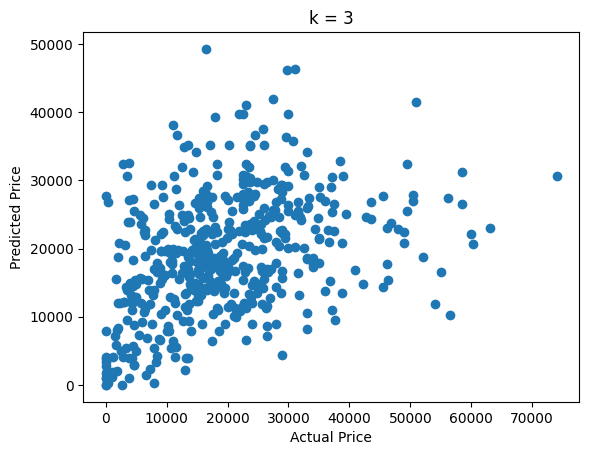

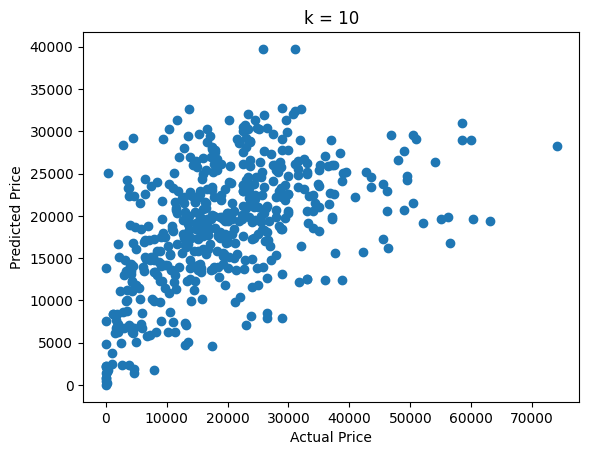

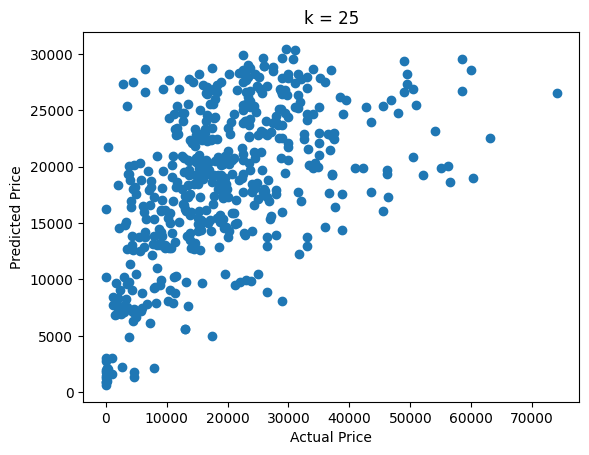

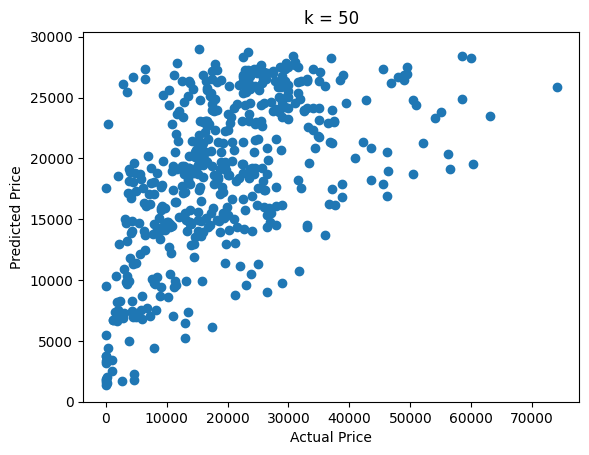

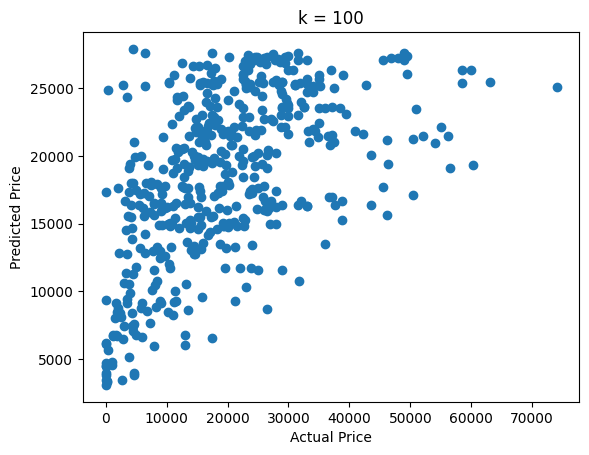

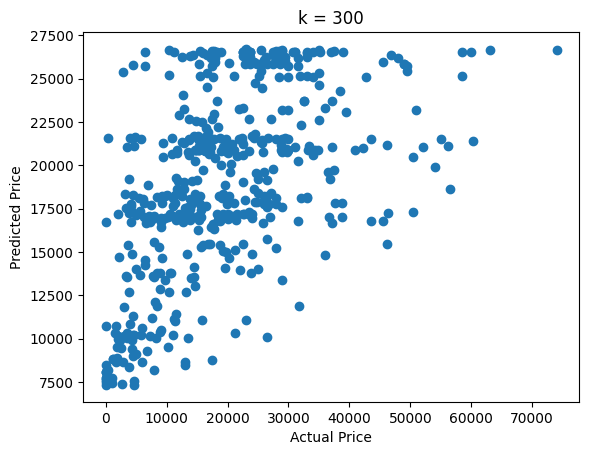

{3: 148065935.51955554,
 10: 117399126.10604002,
 25: 112576160.82390079,
 50: 110202549.3014296,
 100: 112253932.8184272,
 300: 114496301.82933456}

In [ ]:
k_values = [3, 10, 25, 50, 100, 300]
mse_results = {}

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    mse_results[k] = mse

    plt.figure()
    plt.scatter(y_test, preds)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"k = {k}")
    plt.show()

mse_results

As k increases, the model averages over more neighbors. Additionally, extreme prices get pulled toward the mean. For example, expensive cars are underpredicted and cheaper cars are overpredicted.

5.

In [ ]:
optimal_k = min(mse_results, key=mse_results.get)
optimal_k

50

The optimal k is the one that produced the lowest test set mean squared error, which was k = 50.

6. For small k (ex: 3), the predictions were highly scattered and closely followed individual observations. Because of this, the model resulted in high variability. This is an example of overfitting, where the model captures random fluctuations in the training data rather than the true underlying relationship.

As k increased (ex: 10, 25, 50), the predictions became more stable. The scatter narrowed and predictions aligned closer to the overall trend in prices.

For large k (ex: 100, 300), predictions became clustered around the mean price. Expensive cars were underpredicted and cheaper cars were overpredicted. This is an example of underfitting, where the model is too simple and fails to capture important details in the data.

**Q6.** This is a case study using $k$ nearest neighbor regression for imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.


1.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
airbnb = pd.read_csv('/content/data/airbnb_hw.csv')

In [ ]:
airbnb['Price'] = (
    airbnb['Price']
    .astype(str)
    .str.replace(',', '', regex=False)
    .str.replace('$', '', regex=False)
)

airbnb['Price'] = pd.to_numeric(airbnb['Price'], errors='coerce')

In [ ]:
airbnb_vars = airbnb.loc[:, ['Review Scores Rating', 'Price', 'Beds']]
airbnb_vars.head()

,Review Scores Rating,Price,Beds
0,NaN,145,1.0
1,NaN,37,1.0
2,NaN,28,1.0
3,NaN,199,3.0
4,96.0,549,3.0


2.

In [ ]:
missing_airbnb = airbnb_vars.loc[airbnb_vars['Review Scores Rating'].isnull()].copy()
missing_airbnb

,Review Scores Rating,Price,Beds
0,NaN,145,1.0
1,NaN,37,1.0
2,NaN,28,1.0
3,NaN,199,3.0
13,NaN,68,1.0
...,...,...,...
30473,NaN,300,5.0
30474,NaN,125,2.0
30475,NaN,80,1.0
30476,NaN,35,1.0


3.

In [ ]:
airbnb_clean = airbnb_vars.dropna(axis=0, how='any')
airbnb_clean

,Review Scores Rating,Price,Beds
4,96.0,549,3.0
5,100.0,149,1.0
6,100.0,250,1.0
7,94.0,90,1.0
8,90.0,270,2.0
...,...,...,...
30332,100.0,90,1.0
30347,80.0,65,1.0
30378,100.0,55,1.0
30404,100.0,60,1.0


4.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
X = airbnb_clean[['Price', 'Beds']]
y = airbnb_clean['Review Scores Rating']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
k_values = [3, 5, 10, 20, 50, 100]
mse_results = {}

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    mse_results[k] = mse

mse_results

{3: 109.46280804883564,
 5: 90.57613384580603,
 10: 79.26373954329641,
 20: 74.46886558896678,
 50: 72.59361944381642,
 100: 71.75795568618584}

In [ ]:
optimal_k = min(mse_results, key=mse_results.get)
optimal_k

100

In [ ]:
final_model = KNeighborsRegressor(n_neighbors=optimal_k)
final_model.fit(X, y)

KNeighborsRegressor(n_neighbors=100)

I chose k by splitting the complete cases into training and test sets. I estimated the model for several values (3, 5, 10, 20, 50, 100) and computed the test set mean squared error for each. I selected the value that minimized the prediction error, which was 100.

5.

In [ ]:
X_missing = missing_airbnb[['Price', 'Beds']].dropna()
predicted_missing = final_model.predict(X_missing)

missing_airbnb.loc[X_missing.index, 'Predicted Review Score'] = predicted_missing
predicted_missing

array([94.06, 87.88, 86.19, ..., 92.26, 86.84, 92.26])

6.

In [ ]:
import matplotlib.pyplot as plt

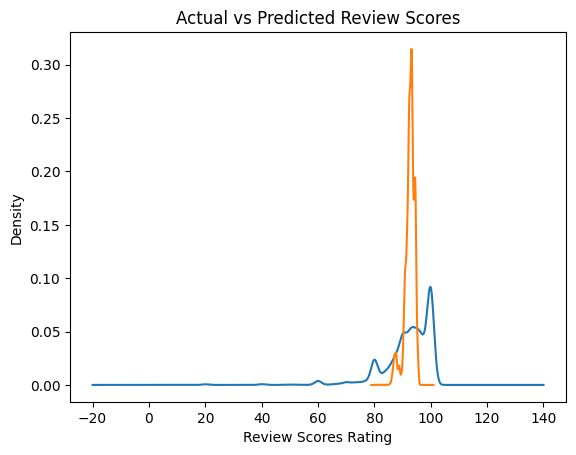

In [ ]:
plt.figure()
y.plot(kind='density')
pd.Series(predicted_missing).plot(kind='density')
plt.xlabel("Review Scores Rating")
plt.title("Actual vs Predicted Review Scores")
plt.show()

They do not look similar. It appears that predicted review scores are significantly more dense than actual movie scores. This means that predicted review scores are more concentrated around the mean.